Linear Regression Approach for Stock Market Prediction (Facebook) - Stock Market History


---
Osamah Adam Mohammed


Sep-5-2023


onyx-snow.com

Note: data is available from kaggle

https://www.kaggle.com/datasets/kalilurrahman/facebook-stock-data-live-and-latest

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data3=pd.read_csv('/content/facebook.csv')
data3.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.00,38.0,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.66,33.0,34.029999,168192700,0,0


In [ ]:
#get the data raws and columns
data3.shape

(2359, 8)

In [ ]:
#drop columns
data2=data3.drop('Dividends',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
data=data2.drop('Stock Splits',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


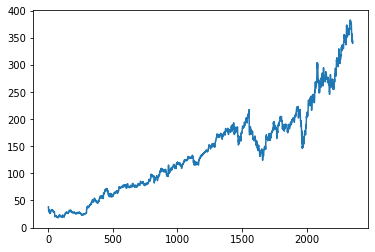

In [ ]:
data2=data.reset_index()['Close']
plt.plot(data2)

In [ ]:
x_independent=data[['Open','High','Low','Volume']].values
y_dependent=data[['Close']].values

In [ ]:
#splid data
x_train, x_test, y_train, y_test=train_test_split(x_independent,y_dependent, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape)

(1887, 4)


In [ ]:
#define model
model=LinearRegression()

In [ ]:
#train model
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predictior=model.predict(x_test)
print(y_predictior)

[[ 54.80444614]
 [208.87644019]
 [178.14053434]
 [ 75.94086705]
 [ 26.26740662]
 [144.45198286]
 [144.75885121]
 [176.0052991 ]
 [171.78134794]
 [130.29336691]
 [ 26.28114023]
 [ 64.54471824]
 [ 28.00452378]
 [147.42134325]
 [342.4184697 ]
 [ 71.64842351]
 [178.73894498]
 [ 76.61339557]
 [ 44.64515559]
 [189.07080198]
 [ 74.1388168 ]
 [178.86188195]
 [ 28.14279604]
 [ 76.22690699]
 [186.30808786]
 [308.56692576]
 [ 69.10677677]
 [151.953219  ]
 [105.10576013]
 [179.88528318]
 [ 61.66052457]
 [313.73100448]
 [ 76.81864071]
 [110.00012073]
 [ 26.45321554]
 [172.49679381]
 [ 19.32000947]
 [304.57379264]
 [ 77.32711041]
 [ 21.06139993]
 [159.94725106]
 [ 59.81797137]
 [ 31.66092322]
 [ 75.62569356]
 [357.21734473]
 [105.84203381]
 [274.41650286]
 [148.27102396]
 [209.73888439]
 [ 75.64419435]
 [171.03019075]
 [118.07905865]
 [ 46.22249518]
 [133.86391476]
 [187.65683821]
 [115.70995958]
 [363.0701675 ]
 [155.29681705]
 [ 79.14713385]
 [ 27.50598002]
 [119.42619023]
 [ 57.52347355]
 [ 48.55

In [ ]:
print(len(x_test), len(y_test))

472 472


In [ ]:
#model evaluation accuracy
from sklearn.metrics import r2_score
r2_score(y_test,y_predictior)

0.999823133766642

In [ ]:
#differences
dataFrame= pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_predictior.flatten(), 'Differences':y_test.flatten()-y_predictior.flatten()})
print(dataFrame)

         actual   predicted  Differences
0     55.570000   54.804446     0.765554
1    209.529999  208.876440     0.653559
2    178.070007  178.140534    -0.070527
3     74.690002   75.940867    -1.250865
4     26.360001   26.267407     0.092594
..          ...         ...          ...
467  150.240005  150.414054    -0.174049
468  198.389999  196.991731     1.398268
469  155.270004  154.652489     0.617516
470  313.089996  311.682881     1.407116
471   72.910004   74.154150    -1.244146

[472 rows x 3 columns]


In [ ]:
#error calculation
print("root mean squared error :",np.sqrt(metrics.mean_squared_error(y_test,y_predictior)))
print("mean squared error :", metrics.mean_squared_error(y_test,y_predictior))
print("mean absolute :", metrics.mean_absolute_error(y_test,y_predictior))

root mean squared error : 1.1136772633061651
mean squared error : 1.2402770468051096
mean absolute : 0.7083395163851277


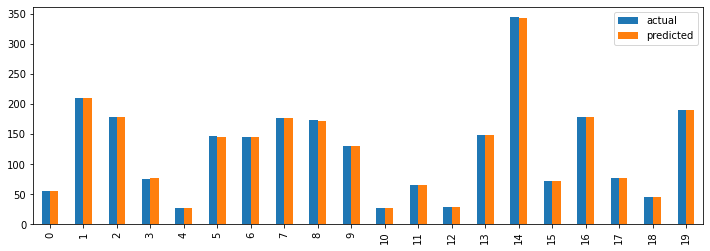

In [ ]:
#visualization for evaluation
dataFram2= pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_predictior.flatten()})

visual= dataFram2.head(20)
visual.plot(kind='bar',figsize=(12, 4))